In [54]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dateutil
import seaborn as sns

# File to Load
nyc_complaint_load = "NYPD_Complaint_Data_Historic.csv"
nyc_complaint_data = pd.read_csv(nyc_complaint_load)

/Users/davidmartinez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
#Organize files
nyc_complaint_organized = nyc_complaint_data.drop(columns=["RPT_DT", "CMPLNT_NUM","CMPLNT_FR_TM","CMPLNT_TO_DT","CMPLNT_TO_TM","KY_CD","OFNS_DESC","PD_CD","PD_DESC","CRM_ATPT_CPTD_CD", "LAW_CAT_CD", "JURIS_DESC", "ADDR_PCT_CD", "LOC_OF_OCCUR_DESC", "PREM_TYP_DESC", "PARKS_NM", "HADEVELOPT", "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude", "Lat_Lon"])

print(nyc_complaint_organized.head())


  CMPLNT_FR_DT    BORO_NM
0   12/31/2015      BRONX
1   12/31/2015     QUEENS
2   12/31/2015  MANHATTAN
3   12/31/2015     QUEENS
4   12/31/2015  MANHATTAN


In [56]:
nyc_complaint_df = pd.DataFrame(nyc_complaint_organized)
print(nyc_complaint_df)

        CMPLNT_FR_DT        BORO_NM
0         12/31/2015          BRONX
1         12/31/2015         QUEENS
2         12/31/2015      MANHATTAN
3         12/31/2015         QUEENS
4         12/31/2015      MANHATTAN
5         12/31/2015       BROOKLYN
6         12/31/2015      MANHATTAN
7         12/31/2015          BRONX
8         12/31/2015          BRONX
9         12/31/2015      MANHATTAN
10        12/31/2015          BRONX
11        12/31/2015      MANHATTAN
12        12/31/2015      MANHATTAN
13        12/31/2015      MANHATTAN
14        12/31/2015       BROOKLYN
15        12/31/2015         QUEENS
16        12/31/2015      MANHATTAN
17        12/31/2015          BRONX
18        12/31/2015       BROOKLYN
19        12/31/2015         QUEENS
20        12/31/2015       BROOKLYN
21        04/06/2015         QUEENS
22        12/31/2015         QUEENS
23        12/31/2015       BROOKLYN
24        12/31/2015       BROOKLYN
25        12/31/2015       BROOKLYN
26        12/31/2015       B

In [57]:
nyc_complaint_df = nyc_complaint_df.rename(columns={"CMPLNT_FR_DT": "Date Complaint Reported", "BORO_NM": "Borough"})

In [58]:
nyc_complaint_df.tail(175)

,Date Complaint Reported,Borough
6048621,12/31/2016,BROOKLYN
6048622,12/31/2016,BROOKLYN
6048623,12/31/2016,BRONX
6048624,12/31/2016,QUEENS
6048625,12/31/2016,MANHATTAN
6048626,12/31/2016,BROOKLYN
6048627,12/31/2016,BROOKLYN
6048628,12/31/2016,BROOKLYN
6048629,12/31/2016,MANHATTAN
6048630,12/31/2016,BRONX


In [59]:
nyc_complaint_df.describe()

,Date Complaint Reported,Borough
count,6048141,6048333
unique,7258,5
top,01/01/2010,BROOKLYN
freq,2395,1804644


In [60]:
nyc_complaint_df_2 = nyc_complaint_df.dropna()

In [61]:
nyc_complaint_df_2.groupby("Borough").count()

,Date Complaint Reported
Borough,
BRONX,1313036
BROOKLYN,1804432
MANHATTAN,1446094
QUEENS,1197187
STATEN ISLAND,286929


In [62]:
y2012 = nyc_complaint_df_2[nyc_complaint_df_2['Date Complaint Reported'].str.contains("2012")].groupby("Borough").count()
y2012 = y2012.reset_index()

In [63]:
y2012.rename(columns={"Date Complaint Report": "Number of Complaints"})
y2012

,Borough,Date Complaint Reported
0,BRONX,106958
1,BROOKLYN,154802
2,MANHATTAN,119956
3,QUEENS,99172
4,STATEN ISLAND,23621


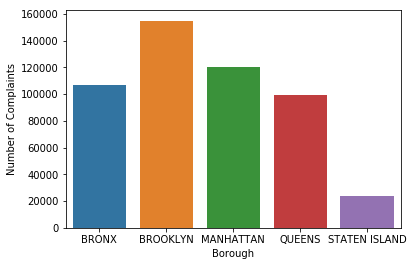

In [64]:
ax = sns.barplot(y = "Date Complaint Reported", x = "Borough", data=y2012)
ax.set(xlabel = "Borough", ylabel = "Number of Complaints")
plt.savefig("2012.Complaints.png")
#plt.show()

In [65]:
#plt.savefig("2012.Complaints.png")
#plt.show()

In [66]:
y2013 = nyc_complaint_df_2[nyc_complaint_df_2['Date Complaint Reported'].str.contains("2013")].groupby("Borough").count()
y2013 = y2013.reset_index()

In [67]:
y2013.rename(columns={"Date Complaint Report": "Number of Complaints"})
y2013

,Borough,Date Complaint Reported
0,BRONX,104166
1,BROOKLYN,149725
2,MANHATTAN,117883
3,QUEENS,101051
4,STATEN ISLAND,22628


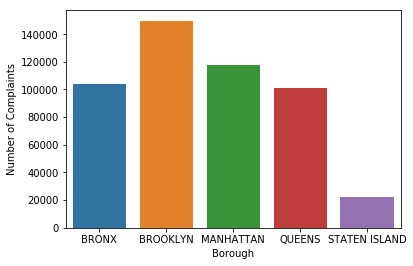

In [68]:
ax = sns.barplot(y = "Date Complaint Reported", x = "Borough", data=y2013)
ax.set(xlabel = "Borough", ylabel = "Number of Complaints")
plt.savefig("2013.Complaints.png")
#plt.show()

In [69]:
#plt.savefig("2013.Complaints.png")
#plt.show()

In [70]:
y2014 = nyc_complaint_df_2[nyc_complaint_df_2['Date Complaint Reported'].str.contains("2014")].groupby("Borough").count()
y2014 = y2014.reset_index()

In [71]:
y2014.rename(columns={"Date Complaint Report": "Number of Complaints"})
y2014

,Borough,Date Complaint Reported
0,BRONX,106276
1,BROOKLYN,148804
2,MANHATTAN,113398
3,QUEENS,100356
4,STATEN ISLAND,22767


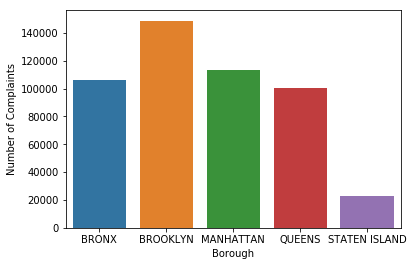

In [72]:
ax = sns.barplot(y = "Date Complaint Reported", x = "Borough", data=y2014)
ax.set(xlabel = "Borough", ylabel = "Number of Complaints")
plt.savefig("2014.Complaints.png")
#plt.show()

In [73]:
#plt.savefig("2014.Complaints.png")
#plt.show()

In [74]:
y2015 = nyc_complaint_df_2[nyc_complaint_df_2['Date Complaint Reported'].str.contains("2015")].groupby("Borough").count()
y2015 = y2015.reset_index()

In [75]:
y2015.rename(columns={"Date Complaint Report": "Number of Complaints"})
y2015

,Borough,Date Complaint Reported
0,BRONX,105032
1,BROOKLYN,142855
2,MANHATTAN,112890
3,QUEENS,94906
4,STATEN ISLAND,22170


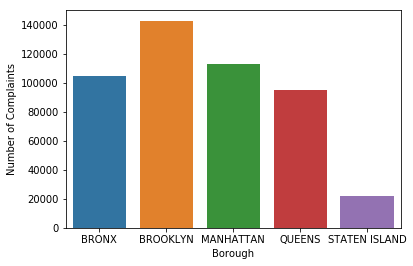

In [76]:
ax = sns.barplot(y = "Date Complaint Reported", x = "Borough", data=y2015)
ax.set(xlabel = "Borough", ylabel = "Number of Complaints")
plt.savefig("2015.Complaints.png")
#plt.show()

In [77]:
#plt.savefig("2015.Complaints.png")
#plt.show()

In [78]:
y2016 = nyc_complaint_df_2[nyc_complaint_df_2['Date Complaint Reported'].str.contains("2016")].groupby("Borough").count()
y2016 = y2016.reset_index()

In [79]:
y2016.rename(columns={"Date Complaint Report": "Number of Complaints"})
y2016

,Borough,Date Complaint Reported
0,BRONX,105527
1,BROOKLYN,140162
2,MANHATTAN,115174
3,QUEENS,94068
4,STATEN ISLAND,21736


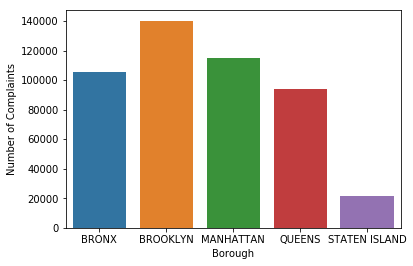

In [80]:
ax = sns.barplot(y = "Date Complaint Reported", x = "Borough", data=y2016)
ax.set(xlabel = "Borough", ylabel = "Number of Complaints")
plt.savefig("2016.Complaints.png")
#plt.show()

In [81]:
#plt.savefig("2016.Complaints.png")
#plt.show()

In [82]:
y2017 = nyc_complaint_df_2[nyc_complaint_df_2['Date Complaint Reported'].str.contains("2017")].groupby("Borough").count()
y2017 = y2017.reset_index()

In [83]:
y2017.rename(columns={"Date Complaint Report": "Number of Complaints"})
y2017

,Borough,Date Complaint Reported
0,BRONX,101305
1,BROOKLYN,134713
2,MANHATTAN,111646
3,QUEENS,89515
4,STATEN ISLAND,20856


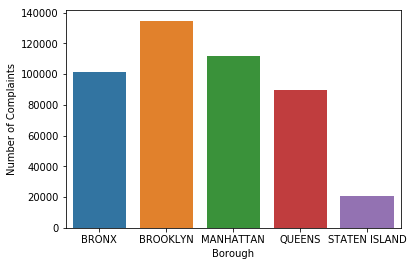

In [84]:
ax = sns.barplot(y = "Date Complaint Reported", x = "Borough", data=y2017)
ax.set(xlabel = "Borough", ylabel = "Number of Complaints")
plt.savefig("2017.Complaints.jpeg")
#plt.show()

In [85]:
#plt.savefig("2017.Complaints.jpeg")
#plt.show